# Hyperparameter tuned Naive Bayes from scratch

We will only be trying to tune the prior in the algorithm to try and tune it for the best performance. 

We will be using random search to do so

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
class NaiveBayes:
    def fit(self, X, y, priors=None):
        # this trains the Naive Bayes classifier.
        
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        if priors is None:
            priors = np.ones(n_classes) / n_classes

        # Calculate the mean, variance, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = priors

        for idx in range(n_classes):
            c = self._classes[idx]
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)

    def predict(self, X):
        
        # Predicts the labels for given data points.
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
       
        # Performs classification for a single data point.
        # takes in x (numpy array): Data point to be classified.
       
        posteriors = []

        # Calculate posterior probability for each class
        for idx in range(len(self._classes)):
            c = self._classes[idx]
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._prob_dens_func(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # Return the class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _prob_dens_func(self, class_idx, x):
        # calc the probability density function for a given class and data point.

        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-(x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [28]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    X = data[['x_1', 'x_2']].values
    y = data['y'].values
    return X, y

def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [37]:
def random_search(X_train, y_train, num_iterations=10):
    
    best_accuracy = 0
    best_priors = None

    for _ in range(num_iterations):
        # Generate random priors and normalize to sum to 1
        priors = np.random.rand(len(np.unique(y_train)))
        priors /= np.sum(priors)
        
        # Create and train Naive Bayes classifier with the random priors
        nb_classifier = NaiveBayes()
        nb_classifier.fit(X_train, y_train, priors)
        
        # Make predictions on the training data
        train_predictions = nb_classifier.predict(X_train)
        
        # Calculate accuracy on the training data
        train_accuracy = calculate_accuracy(y_train, train_predictions)

        # Update best priors and accuracy if current priors perform better
        if train_accuracy > best_accuracy:
            best_accuracy = train_accuracy
            best_priors = priors

    return best_priors


In [38]:
# Load training and testing data
train_file = "ds2_train.csv"
test_file = "ds2_test.csv"

X_train, y_train = load_data(train_file)
X_test, y_test = load_data(test_file)

Best Priors: [0.49574743 0.50425257]
Test Accuracy: 0.92


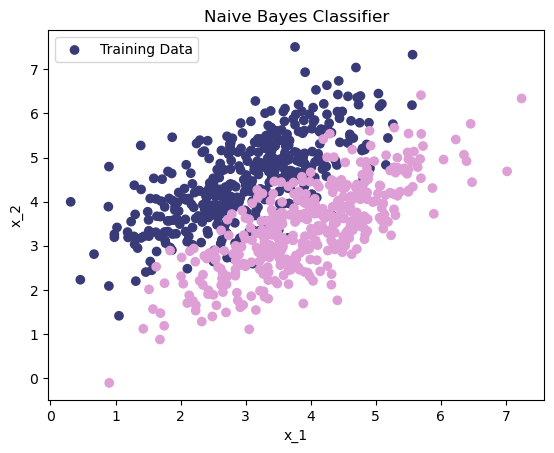

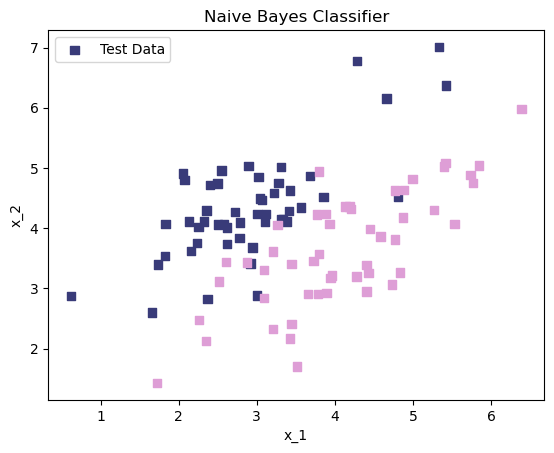

In [39]:
# Hyperparameter tuning using random search on training set
best_priors = random_search(X_train, y_train)
print("Best Priors:", best_priors)

# Train the Naive Bayes classifier using the best priors
nb_classifier = NaiveBayes()
nb_classifier.fit(X_train, y_train, best_priors)

# Make predictions on the test data
test_predictions = nb_classifier.predict(X_test)

# Calculate and print test accuracy
test_accuracy = calculate_accuracy(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

# Visualization of training and test data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab20b', label='Training Data')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Naive Bayes Classifier')
plt.legend()
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='tab20b', marker='s', label='Test Data')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Naive Bayes Classifier')
plt.legend()
plt.show()

As we can see the accuracy is the same. It may increase slightly after more random trials but that wont be enough. 

Tuning the priors in Naive Bayes might not always help, and sometimes it can even lower the accuracy. This happens because Naive Bayes assumes feature independence, which might not be true in real-world datasets. Generally for naive bayes can focus on other hyperparameters like Laplace Smoothing, feature scaling, feature selection, and text preprocessing to improve performance.

To tune these hyperparameters, we can use techniques like grid search, random search, and cross-validation. By doing so, we can achieve better results with Naive Bayes. 

However,Naive bayes is always the best choice for complex datasets. In those cases, considering more advanced models like SVM or Random Forests could be beneficial.

As for our example dataset with 2 input features of continuos nature, we could use some more enhancements on the model by introducing feature engineering.

Now lets plot the decision boundary 

In [40]:
def plot_decision_boundary(X, y, nb_classifier, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = nb_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='tab20b')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab20b', edgecolors='k', label='Data')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title(title)
    plt.legend()
    plt.show()

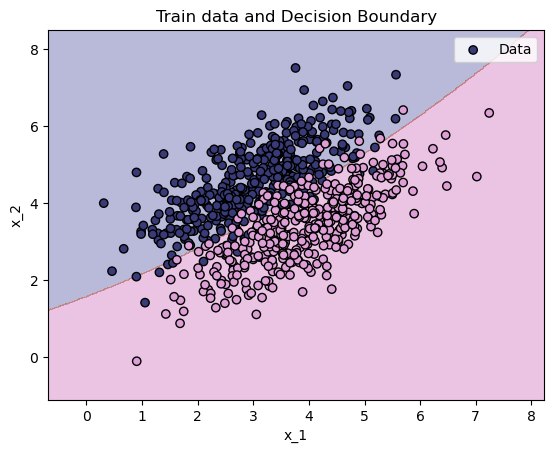

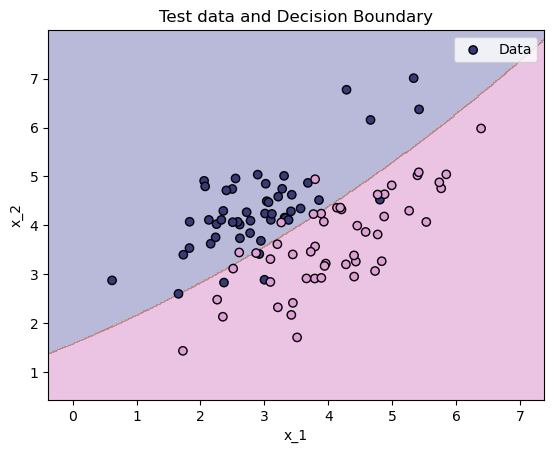

In [41]:
plot_decision_boundary(X_train, y_train, nb_classifier, "Train data and Decision Boundary")
plot_decision_boundary(X_test, y_test, nb_classifier, "Test data and Decision Boundary")

# Thank you

---